<a href="https://download-directory.github.io/?url=https%3A%2F%2Fgithub.com%2Fschoolofcities%2Furban-data-storytelling%2Ftree%2Fmain%2Furban-data-analytics%2Fspatial-data-in-python" target="_blank" download>Download this notebook and data</a>

There are a variety of libraries, methods, and functions for working with spatial data in Python.

[GeoPandas](https://geopandas.org/en/stable/index.html) is a library for working with spatial (typically geographic) data. It is used a lot since it extends the functionality of pandas to support spatial data types and operations, making it easier to analyze, visualize, and manipulate spatial data. 

Many of the tasks that are typically done within a GIS can be done via `geopandas`. And often, it is preferable to work in `geopandas` versus point-and-click GIS (e.g. QGIS) since it's easier to chain together and automate processes, have access to the full capabilities of `pandas` and other Python libraries, as well as can be better scaled for handling very large datasets.

This tutorial provides an introduction to `geopandas`, its geometry data types, how to quickly plot spatial data, and methods for spatial calculations (e.g. computing areas, bounding boxes, etc.). The last section of this tutorial provides direction for next steps, including libraries and examples for doing advanced spatial data processing, analyses, and visualizations.

Here are the links to download this notebook and example data:

- <a href="spatial-data-in-python.ipynb" download>Notebook</a>
- <a href="data/ttc_routes.geojson" download>Toronto transit routes</a>
- <a href="data/ttc_stops.geojson" download>Toronto transit stops</a>
- <a href="data/ttc_stops.geojson" download>Toronto transit stops</a>
- <a href="data/city-wards.geojson" download>Toronto wards</a>

This tutorial assumes you have base knowledge of working with spatial data (e.g. in GIS) and working with dataframes in `pandas`. Check out the following if you want a refresher: 

- [Spatial data and GIS](../spatial-data-and-gis/spatial-data-and-gis.md)
- [Data analytics and processing](../data-analytics-and-processing/data-analytics-and-processing.ipynb)

We'll begin this tutorial by loading in `pandas`, `geopandas`, and `matplotlib` (the latter for showing how to quickly plot and view data). If you don't have these installed already, you'll have to install them via `pip` or `conda`.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Loading and exploring geometric data

Geospatial data represents real-world features using three primary geometric types:

 - Points: Single (x,y) coordinates for discrete locations like transit stops or landmarks.

 - Lines: Connected sequences of points forming paths, such as roads or rivers.
 
 - Polygons: Closed shapes defining areas like census tracts or property boundaries.

In [2]:
transit_stops = gpd.read_file("data/ttc_stops.geojson")
transit_routes = gpd.read_file("data/ttc_routes.geojson")
wards = gpd.read_file("data/city-wards.geojson")

In geopandas, we typically load data with a more agnostic [read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) function. For this workshop, we're going to use four sources of data:

 - `transit_stops`: each of the stops for the TTC

 - `transit_routes`: each of the lines for the TTC
 
 - `wards`: polygons of City of Toronto wards (i.e. council districts)

Let's take a look at the first layer, the transit stops. We have two columns with text, and a third with geometry data.

Here the data are coded as a `MULTILINESTRING`, essentially a combination of lines that combine into one object. 

In [3]:
transit_routes

,STATUS,TECHNOLOGY,NAME,geometry
0,Existing,Subway,Line 4: Sheppard Subway,"MULTILINESTRING ((-79.41092 43.76152, -79.4096..."
1,Existing,Subway,Line 1: Yonge-University Subway,"MULTILINESTRING ((-79.52727 43.79351, -79.5261..."
2,Existing,Subway,Line 2: Bloor-Danforth Subway,"MULTILINESTRING ((-79.26453 43.73227, -79.2669..."
3,In Delivery,LRT / BRT,Eglinton Crosstown LRT,"MULTILINESTRING ((-79.26453 43.73227, -79.2679..."
4,In Delivery,LRT / BRT,Eglinton Crosstown West Extension,"MULTILINESTRING ((-79.48726 43.68739, -79.4901..."
5,In Delivery,Subway,Scarborough Subway Extension,"MULTILINESTRING ((-79.26453 43.73227, -79.2630..."
6,In Delivery,LRT / BRT,Finch West LRT,"MULTILINESTRING ((-79.49099 43.76349, -79.4922..."
7,In Delivery,Subway,Ontario Line,"MULTILINESTRING ((-79.35168 43.69644, -79.3414..."
8,In Delivery,Subway,Yonge North Subway Extension,"MULTILINESTRING ((-79.41557 43.77977, -79.4157..."


The data can be manipulated like a regular pandas data frame. For example, if we want to filter out routes that currently do not operate, like the incomplete "Eglinton Crosstown LRT" and defunct "Scarborough RT", we can do so by filtering the `STATUS` column.

In [4]:
transit_routes = transit_routes.loc[transit_routes["STATUS"] == "Existing"]
transit_routes

,STATUS,TECHNOLOGY,NAME,geometry
0,Existing,Subway,Line 4: Sheppard Subway,"MULTILINESTRING ((-79.41092 43.76152, -79.4096..."
1,Existing,Subway,Line 1: Yonge-University Subway,"MULTILINESTRING ((-79.52727 43.79351, -79.5261..."
2,Existing,Subway,Line 2: Bloor-Danforth Subway,"MULTILINESTRING ((-79.26453 43.73227, -79.2669..."


Let's do the same for the stops.

The geometry for the stops are simpler, just `POINT`. 

In [5]:
transit_stops = transit_stops.loc[transit_stops["STATUS"] == "Existing"]
transit_stops

,LOCATION_N,STATUS,TECHNOLOGY,NAME,geometry
0,Kipling,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.53628 43.63694)
1,Islington,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.5246 43.64533)
2,Royal York,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.51129 43.64812)
3,Old Mill,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.49509 43.65008)
4,Jane,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.48446 43.6498)
...,...,...,...,...,...
69,Vaughan Metropolitan Centre,Existing,Subway,Line 1: Yonge-University Subway,POINT (-79.52727 43.79351)
70,Sheppard-Yonge,Existing,Subway,Line 4: Sheppard Subway,POINT (-79.41092 43.76152)
71,Spadina,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.40397 43.66729)
72,St. George,Existing,Subway,Line 2: Bloor-Danforth Subway,POINT (-79.39931 43.66828)


Before we go on, it's important to have an idea of the metadata of geometric files that we work with. There's two key parts to this.

 - CRS (Coordinate Reference System): The [crs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html) attribute defines a geodataset's spatial "coordinate system" (e.g., latitude/longitude, meters-based projections). We can use it to ensure layers align—for example, combining Toronto census tracts (EPSG:3347) with a Web Mercator basemap (EPSG:3857).

 - Total Bounds: The [total_bounds](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html) attribute returns the min/max coordinates (xmin, ymin, xmax, ymax) of your data’s extent. It’s useful for setting map zoom levels or clipping other datasets to the same area—like focusing a transit map on Toronto’s downtown core.

In [6]:
transit_stops.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
transit_stops.total_bounds

array([-79.53628,  43.63694, -79.26453,  43.79351])

## Plotting geographic data

We explore geometry simply by plotting using `.plot()`. We can do this for any row, or the entire GeoDataFrame

<Axes: >

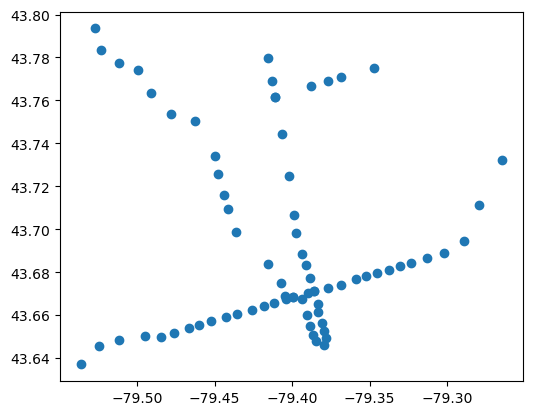

In [8]:
transit_stops.plot()

This is the default plot, but we can tweak the colours, add multiple layers, and change some of the layout options using [matplotlib](https://matplotlib.org/), a commonly used Python plotting library. Here's a very simple schematic of rapid transit in Toronto.

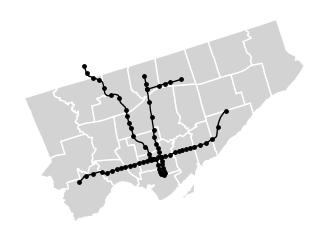

In [9]:
fig, ax = plt.subplots(ncols = 1, figsize=(4, 4))

wards.plot(
    linewidth = 1,
    color="LightGray",
    edgecolor="White",
    ax = ax
)

transit_stops.plot(
    color="Black",
    markersize = 6,
    ax = ax
)

transit_routes.plot(
    linewidth = 1,
    color="Black",
    ax = ax
).set_axis_off()

## Interactive Exploration

GeoPandas’ [explore()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) function  generates an interactive Leaflet map (like Google Maps) from your geodata. We can use it to better understand the data we are working with and how it might be viewed from the user side on a web application (e.g., Svelte).

You'll need to install a couple libraries in order for this to work - matplotlib, folium, and mapclassify. This can be done in the environment that you're working in with a command like `pip install folium matplotlib mapclassify`.

In [10]:
transit_stops.explore(
    column='NAME',
    tiles="CartoDB Positron", 
    marker_kwds={"radius": 7}
)

## Geometery properties

`geopandas` has a number of functions you can run on geometry columns that can be super useful for analyzing and summarizing data. Here's a list of a few examples of using these to create a new column of data (more can be found in the [official documentation](https://geopandas.org/en/stable/docs.html))

| Property       | Description                         | Example                               |
|----------------|-------------------------------------|----------------------------------------|
| `.area`        | Area of the geometry (in CRS units) | `gdf["area"] = gdf.geometry.area`      |
| `.length`      | Line length (perimeter length for polygons) | `gdf["length"] = gdf.geometry.length`  |
| `.is_valid`    | Geometry validity check             | `gdf["valid"] = gdf.geometry.is_valid` |
| `.is_empty`    | Whether geometry is empty           | `gdf["empty"] = gdf.geometry.is_empty` |
| `.is_simple`   | No self-intersections               | `gdf["simple"] = gdf.geometry.is_simple` |
| `.type`        | Type of geometry (e.g., Polygon)    | `gdf["geom_type"] = gdf.geometry.type` |
| `.bounds`      | Bounding box as (minx, miny, maxx, maxy) | `gdf["bounds"] = gdf.geometry.bounds`  |


## Processing and analyzing spatial data

This tutorial provided a quick overview of how we can work with spatial data in `geopandas`. However, this just scratched the surface of what is possible

If you’re interested the why and how of spatial data processing, i.e. about converting spatial data from one format to another (e.g. generating centroids of polygons, buffers around points, joining and linking multiple spatial datasets to each other, etc.),  check out our [Processing spatial data](../spatial-data-processing/spatial-data-processing.ipynb) tutorial.

Beyond that, you can check out the following Python libraries for working with spatial data:

- [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) (wide variety of tools for manipulation of 2d geometry data, some of which `geopandas` uses.)
- [Pysal](https://pysal.org/pysal/) (spatial data analysis library, including various descriptive statistics and spatial modelling functions)
- [Rasterio](https://shapely.readthedocs.io/en/stable/) (library for working with raster data)
- [Folium](https://python-visualization.github.io/folium/latest/) (more interactive maps!)